In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

guia1: ejercicio 4

In [ ]:
alpha = 0.05
p = 0.4

def p_n(sample):
  return (1/(len(sample)-1))*sample.sum()

def epsilon_n(sample, alpha):
  return np.sqrt((1/(2*len(sample)))*np.log(2/alpha))

In [ ]:
_data = []
for n in range(2, 750):

  coverage = 0
  for _ in range(150):
    sample = st.bernoulli.rvs(p=p, size=n)
    interval_min, interval_max = p_n(sample)-epsilon_n(sample, alpha), p_n(sample)+epsilon_n(sample, alpha)
    if interval_min < p < interval_max:
      coverage +=1
  coverage = coverage/150
  _data.append(coverage)

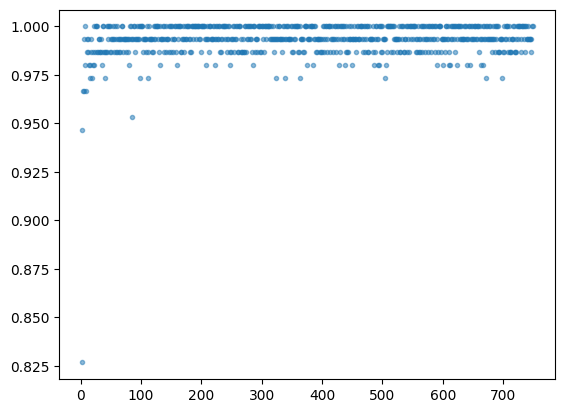

In [ ]:
plt.scatter(x=np.arange(2,750), y=_data, alpha=0.5, marker=".")

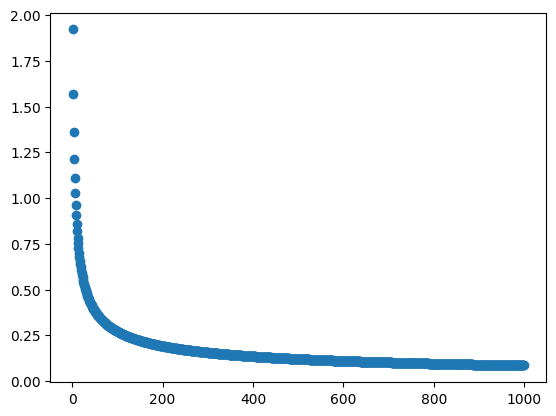

In [ ]:
_data = []
for n in range(2,1000):
  sample = st.bernoulli.rvs(p=p, size=n)
  interval_l = 2*epsilon_n(sample, alpha)
  _data.append(interval_l)

plt.scatter(x=np.arange(2,1000), y=_data)

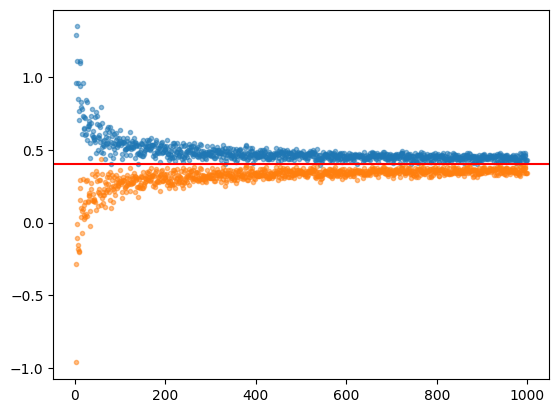

In [ ]:
_max = []
_min = []

for n in range(2,1000):

  sample = st.bernoulli.rvs(p=p, size=n)
  interval_min, interval_max = p_n(sample)-epsilon_n(sample, alpha), p_n(sample)+epsilon_n(sample, alpha)
  _max.append(interval_max)
  _min.append(interval_min)

plt.scatter(x=np.arange(2,1000), y=_max,marker=".", alpha=0.5)
plt.scatter(x=np.arange(2,1000), y=_min,marker=".", alpha=0.5)
plt.axhline(y=0.4, color='r', linestyle='-')

ejercicio 5 , distribucion iv)

In [ ]:
def custom_pdf(x, theta): #en el (0,1). == a 0 en el resto de los valores.
  return (1/theta)*x**((1/theta)-1)

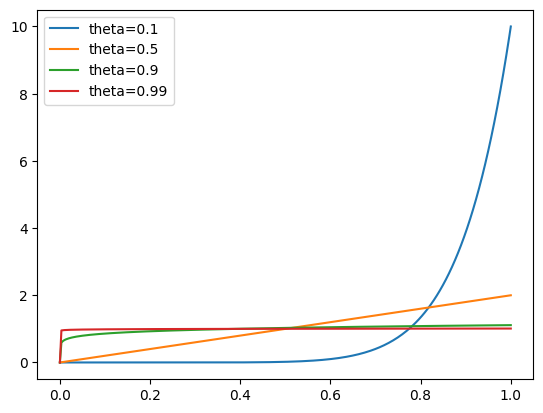

In [ ]:
x = np.linspace(start=0, stop=1, num=300)

for theta in [0.1, 0.5, 0.9, 0.99]:
  _vals = [custom_pdf(val, theta) for val in x]
  plt.plot(x, _vals, label=f"theta={theta}")
plt.legend()

Ej 6

In [ ]:
sample = np.array([25.11, 25.02, 25.16, 24.98, 24.83, 25.05, 24.94, 25.04, 24.99, 24.96,
25.03, 24.97, 24.93, 25.12, 25.01, 25.12, 24.90, 24.98, 25.10, 24.96])

In [ ]:
mu_hat = sample.mean()
mu_hat

25.009999999999998

In [ ]:
st.norm.interval(loc=sample.mean(), scale=(0.01/len(sample))**0.5, confidence=0.95) #IC 95% para la media de la muestra

(24.96617387297117, 25.053826127028827)

ej 7)

In [ ]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

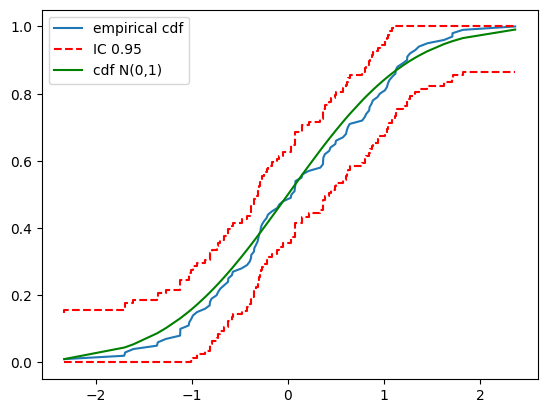

In [ ]:
sample = st.norm.rvs(loc= 0, scale=1, size=100)
F_hat = st.ecdf(sample)
x = F_hat.cdf.quantiles
F = F_hat.cdf.probabilities

plt.plot(x,F, label="empirical cdf") #plot cdf empirica

low, up = confidence_interval_dkw(F_hat.cdf, alpha=.05) #intervalos de confianza no parametricos DKW theorem
plt.step(x, low, "r--", label="IC 0.95")
plt.step(x, up, "r--")

plt.plot(x, st.norm.cdf(x), color="g", label="cdf N(0,1)") #real

plt.legend()


ej 8)

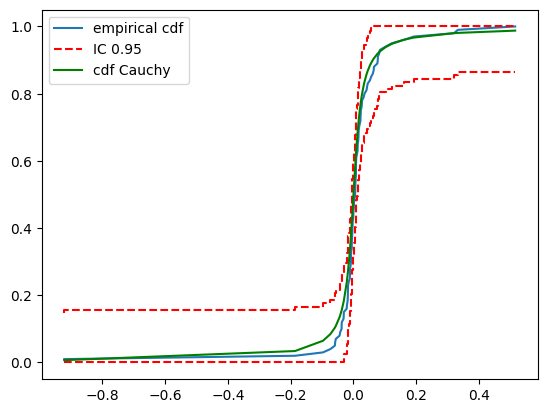

In [ ]:
sample = st.cauchy.rvs(loc=0, scale=0.02, size=100)
F_hat = st.ecdf(sample)
x = F_hat.cdf.quantiles
F = F_hat.cdf.probabilities

plt.plot(x,F, label="empirical cdf") #plot cdf empirica

low, up = confidence_interval_dkw(F_hat.cdf, alpha=.05) #intervalos de confianza no parametricos DKW theorem
plt.step(x, low, "r--", label="IC 0.95")
plt.step(x, up, "r--")

plt.plot(x, st.cauchy.cdf(x, loc=0, scale=0.02), color="g", label="cdf Cauchy") #real

plt.legend()


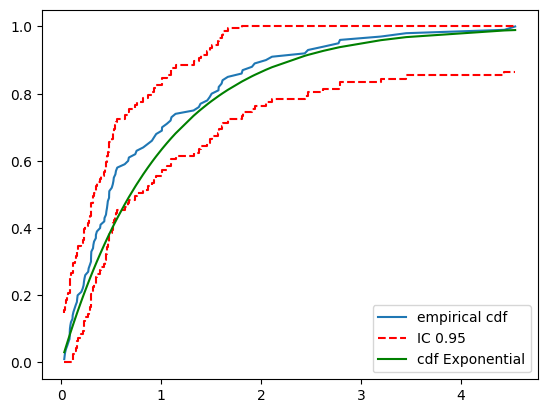

In [ ]:
sample = st.expon.rvs( size=100)
F_hat = st.ecdf(sample)
x = F_hat.cdf.quantiles
F = F_hat.cdf.probabilities

plt.plot(x,F, label="empirical cdf") #plot cdf empirica

low, up = confidence_interval_dkw(F_hat.cdf, alpha=.05) #intervalos de confianza no parametricos DKW theorem
plt.step(x, low, "r--", label="IC 0.95")
plt.step(x, up, "r--")

plt.plot(x, st.expon.cdf(x), color="g", label="cdf Exponential") #real

plt.legend()

guia2 : Ej1

a)

In [ ]:
def f(x):
  return 2*x-1

X = st.uniform(0, 1).rvs(100)
Y = f(X)

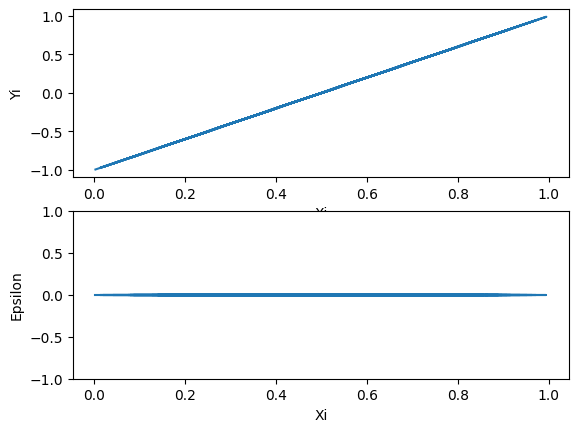

In [ ]:
fig, ax = plt.subplots(2)

ax[0].plot(X, Y)
ax[0].set_xlabel("Xi")
ax[0].set_ylabel("Yi")

m, b = np.polyfit(X, Y, 1)
epsilon = Y - (m*X +b)

ax[1].plot(X, epsilon)
ax[1].set_ylim(-1,1)
ax[1].set_xlabel("Xi")
ax[1].set_ylabel("Epsilon")

plt.show()

# No hay ruido, la estimacion es perfecta y todos los epsilon son exactamente 0.

b)


In [ ]:
def f(x, z):
  return 2*x-1+z

X = st.uniform(0, 1).rvs(100)
z = st.norm(0, (0.25)**0.5).rvs(100)
Y = f(X, z)

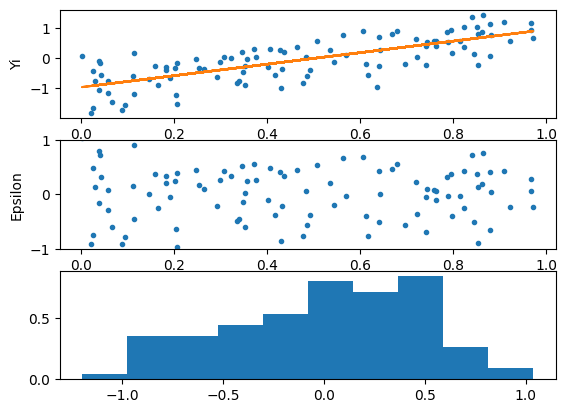

In [ ]:
fig, ax = plt.subplots(3)

ax[0].plot(X, Y, ".")
ax[0].set_xlabel("Xi")
ax[0].set_ylabel("Yi")

m, b = np.polyfit(X, Y, 1)
epsilon = Y - (m*X +b)

ax[0].plot(X, m*X +b, "-")

ax[1].plot(X, epsilon, ".")
ax[1].set_ylim(-1,1)
ax[1].set_xlabel("Xi")
ax[1].set_ylabel("Epsilon")

ax[2].hist(epsilon, density=True)

plt.show()

# Los epsilons tienen un distribucion normal, que se corresponde con la distribucion del ruido agregado en el proceso de generacion de datos.

c)


In [ ]:
def f(x, z):
  return 2*x-1+z

_mean = np.zeros(2000-10)
_variance = np.zeros(2000-10)
for n in range(10, 2000):
  X = st.uniform(0, 1).rvs(n)
  z = st.norm(0, (0.25)**0.5).rvs(n)
  Y = f(X, z)

  m, b = np.polyfit(X, Y, 1)
  epsilon = Y - (m*X +b)
  _mean[n-10] = epsilon.mean()
  _variance[n-10] = epsilon.var()


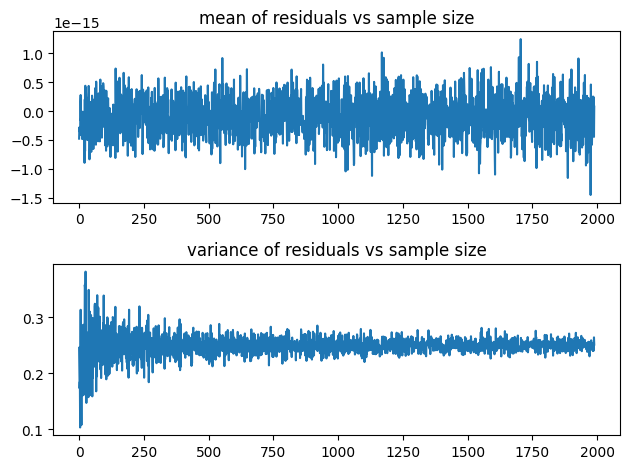

In [ ]:
fig, ax = plt.subplots(2)
ax[0].plot(_mean)
ax[0].set_title("mean of residuals vs sample size")

ax[1].plot(_variance)
ax[1].set_title("variance of residuals vs sample size")

plt.tight_layout()
plt.show()

Ej 2)

$f(x) = 2x -1$

sea $X \sim \mathcal{U}(0,1)$ y $Z \sim \mathcal{N}(0,.25)$

$ Y \sim f(X)+Z$

In [ ]:
#a) tomar n muestras y_i y realizar la regresion lineal
n = 100
x_i = st.uniform(0, 1).rvs(n)
y_i = 2*x_i -1 + st.norm(0, .25**0.5).rvs(n)

Sxy = sum((x_i - x_i.mean())*(y_i - y_i.mean()))
Sxx = sum((x_i - x_i.mean())**2)

B1 = Sxy/Sxx
B0 = y_i.mean() - B1*x_i.mean()

print(f"B0:{B0:.2f}, B1:{B1:.2f}")

B0:-1.07, B1:2.06


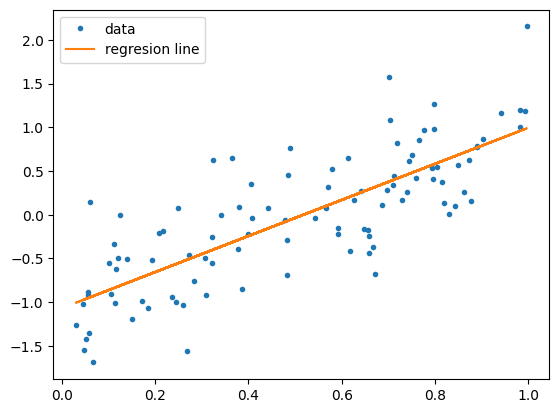

In [ ]:
plt.plot(x_i,y_i, ".", label="data")
plt.plot(x_i, B0+B1*x_i, "-", label="regresion line")
plt.legend()

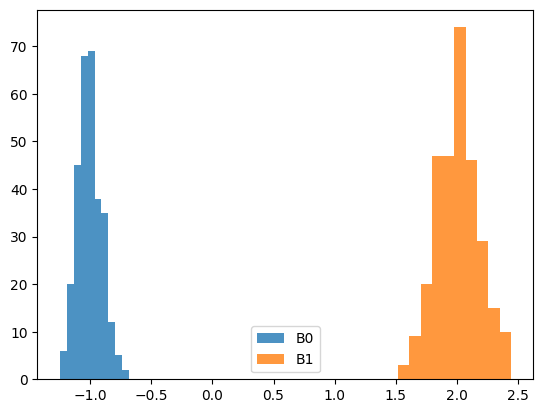

In [ ]:
#b) distribucion de coeficientes
def sample_coefs(n=100):
  x_i = st.uniform(0, 1).rvs(n)
  y_i = 2*x_i -1 + st.norm(0, .25**0.5).rvs(n)

  Sxy = sum((x_i - x_i.mean())*(y_i - y_i.mean()))
  Sxx = sum((x_i - x_i.mean())**2)

  B1 = Sxy/Sxx
  B0 = y_i.mean() - B1*x_i.mean()

  return B0, B1

coefs = np.array([sample_coefs() for _ in range(300)])

plt.hist(coefs.T[0], label="B0", alpha=0.8)
plt.hist(coefs.T[1], label="B1", alpha=0.8)
plt.legend()
plt.show()

In [ ]:
#c) media y varianza de los coeficientes

n_start = 10
n_end = 200

mean_b0_n = np.zeros(n_end - n_start)
mean_b1_n = np.zeros(n_end - n_start)

var_b0_n = np.zeros(n_end - n_start)
var_b1_n = np.zeros(n_end - n_start)


for i, n in enumerate(range(n_start, n_end)):
  _coefs  =  np.array([sample_coefs(n) for _ in range(n)])

  var_b0_n[i] = _coefs.T[0].var()
  var_b1_n[i] = _coefs.T[1].var()

  mean_b0_n[i] = _coefs.T[0].mean()
  mean_b1_n[i] = _coefs.T[1].mean()


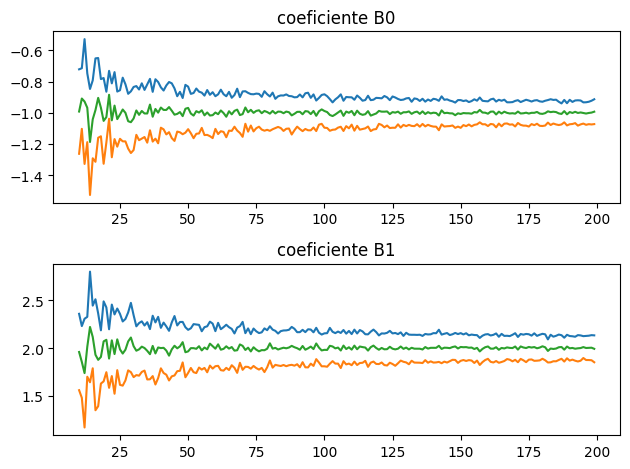

In [ ]:
fig, ax = plt.subplots(2)

ax[0].set_title("coeficiente B0")
ax[0].plot(np.arange(n_start, n_end), mean_b0_n + np.sqrt(var_b0_n), label="MEAN + 1SD")
ax[0].plot(np.arange(n_start, n_end), mean_b0_n - np.sqrt(var_b0_n), label="MEAN - 1SD")
ax[0].plot(np.arange(n_start, n_end), mean_b0_n, label="MEAN")

ax[1].set_title("coeficiente B1")
ax[1].plot(np.arange(n_start, n_end), mean_b1_n + np.sqrt(var_b1_n), label="MEAN + 1SD")
ax[1].plot(np.arange(n_start, n_end), mean_b1_n - np.sqrt(var_b1_n), label="MEAN - 1SD")
ax[1].plot(np.arange(n_start, n_end), mean_b1_n, label="MEAN")

plt.tight_layout()

ej  6)

In [ ]:
n = 100

X1 = st.uniform(0,1).rvs(n)
Z = st.norm(0,0.1**0.5).rvs(n)
e = st.norm().rvs(n)

X2 = 0.5*X1+Z
Y = 2 + 2*X1 + 0.3*X2 + e

In [ ]:
#corr entre X1 y X2
# corr(X1, X2) = COV(X1,X2)/(Var(X1)*Var(X2))**0.5

def cov(X,Y):
  assert len(X) == len (Y)
  return (1/(len(X)-1))*((X-X.mean())*(Y-Y.mean())).sum()

def corr(X, Y):
  return cov(X,Y)/(cov(X,X)*cov(Y,Y))**0.5

corr(X1,X2)

0.5150660150412348

Text(37.722222222222214, 0.5, 'X2')

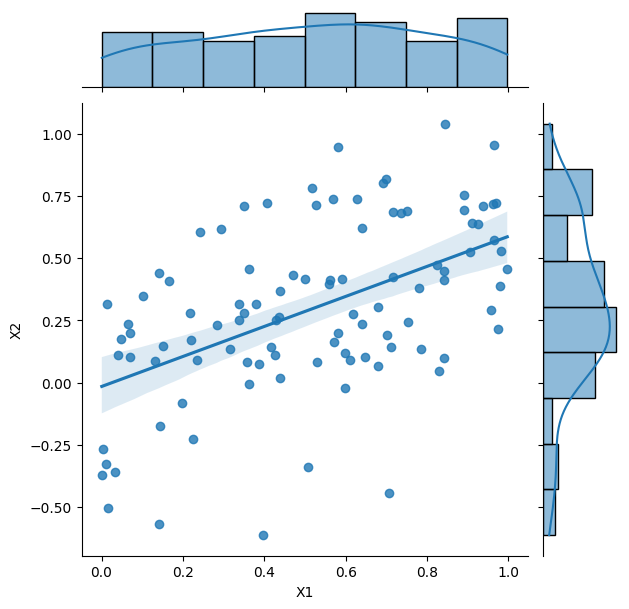

In [ ]:
import seaborn as sns

sns.jointplot(x=X1, y=X2, kind="reg")
plt.xlabel("X1")
plt.ylabel("X2")

In [ ]:
#b) regresion y~x1+x2

X = np.column_stack((np.ones(len(X1)), X1, X2))

B_hat = np.linalg.inv(X.T@X)@X.T@Y

print(f"aprox coeffs{B_hat}")
print(f"real coeffs{[2, 2, .3]}")

aprox coeffs[1.88878532 2.16950632 0.10851713]
real coeffs[2, 2, 0.3]


In [ ]:
#c) i) modelo Y~x1

X = np.column_stack((np.ones(len(X1)), X1))

B_hat = np.linalg.inv(X.T@X)@X.T@Y


print(f"aprox coeffs{B_hat}")
print(f"real coeffs{[2, 2]}")

aprox coeffs[1.88716094 2.23487377]
real coeffs[2, 2]


In [ ]:
#c) i) modelo Y~x2

X = np.column_stack((np.ones(len(X1)), X2))

B_hat = np.linalg.inv(X.T@X)@X.T@Y


print(f"aprox coeffs{B_hat}")
print(f"real coeffs{[2, .3]}")

aprox coeffs[2.72499725 1.06400128]
real coeffs[2, 0.3]


In [ ]:
N_exp = 1000
results = np.zeros((N_exp,3))

for i in range(N_exp):
  n = 100

  X1 = st.uniform(0,1).rvs(n)
  Z = st.norm(0,0.1**0.5).rvs(n)
  e = st.norm().rvs(n)

  X2 = 0.5*X1+Z
  Y = 2 + 2*X1 + 0.3*X2 + e

  X = np.column_stack((np.ones(len(X1)), X1, X2))
  B_hat = np.linalg.inv(X.T@X)@X.T@Y
  results[i] = B_hat


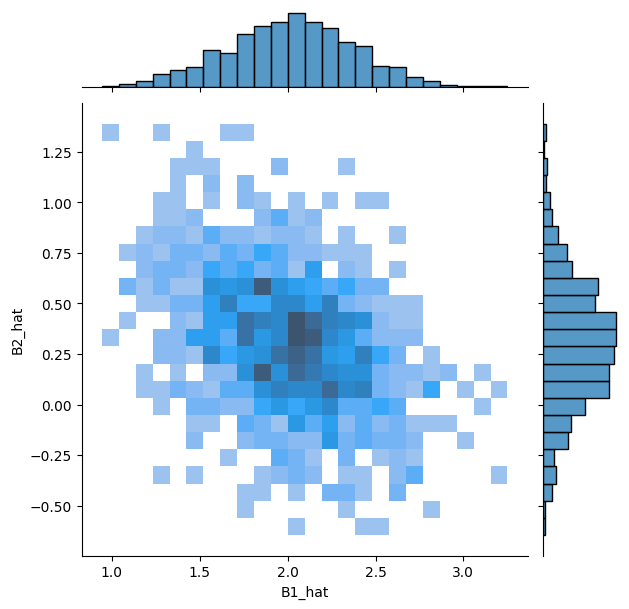

In [ ]:
import seaborn as sns

sns.jointplot(x=results.T[1], y=results.T[2], kind="hist")
plt.xlabel("B1_hat")
plt.ylabel("B2_hat")
plt.show()